In [111]:
from qiskit import IBMQ 

In [112]:
IBMQ.save_account('65fbe3fea2d78c386a26d433f8f87b474b1bfa98596f0d04c76917ee55f25fa70757c61109b5a38b3b665c790e92324d2beb0bef226019875080e9e5246dbdc6', overwrite = True)

In [3]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import MCMT

# import basic plot tools
from qiskit.visualization import plot_histogram

# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
# provider = IBMQ.get_provider("ibm-q")
provider = IBMQ.get_provider(hub='ibm-q-education', group='yale-uni-2', project='cpsc647-quantum')
# device = provider.get_backend('ibmq_lima') #run on ibmq_lima (5-qbit QC)

In [4]:
device_names =  ['ibmq_lima', 'ibmq_bogota', 'ibmq_santiago', 'ibmq_manila', 'ibmq_quito', 'ibmq_belem', 'ibmq_casablanca', 'ibmq_jakarta', 'ibm_lagos', 'ibm_perth'  ]
# device_names =  ['ibmq_lima', 'ibmq_bogota', 'ibmq_santiago', 'ibmq_manila', 'ibmq_quito', 'ibmq_belem']
device = [0]*len(device_names)
for i in range(len(device_names)):
    device[i] = provider.get_backend(device_names[i])
    print("Device", i , "=", device[i])


Device 0 = ibmq_lima
Device 1 = ibmq_bogota
Device 2 = ibmq_santiago
Device 3 = ibmq_manila
Device 4 = ibmq_quito
Device 5 = ibmq_belem
Device 6 = ibmq_casablanca
Device 7 = ibmq_jakarta
Device 8 = ibm_lagos
Device 9 = ibm_perth


In [426]:
# def initialize_s(qc, qubits):
#     """Apply a H-gate to 'qubits' in qc"""
#     for q in qubits:
#         qc.h(q)
#     return qc

# def diffuser(nqubits):
#     qc = QuantumCircuit(nqubits)
#     # Apply transformation |s> -> |00..0> (H-gates)
#     for qubit in range(nqubits):
#         qc.h(qubit)
#     # Apply transformation |00..0> -> |11..1> (X-gates)
#     for qubit in range(nqubits):
#         qc.x(qubit)
#     # Do multi-controlled-Z gate
#     qc.h(nqubits-1)
#     qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
#     qc.h(nqubits-1)
#     # Apply transformation |11..1> -> |00..0>
#     for qubit in range(nqubits):
#         qc.x(qubit)
#     # Apply transformation |00..0> -> |s>
#     for qubit in range(nqubits):
#         qc.h(qubit)
#     # We will return the diffuser as a gate
#     U_s = qc.to_gate()
#     U_s.name = "U$_s$"
#     return U_s

In [428]:
# def grovers_algorithm_3(copies):
#     n = 3 #number of qbits
#     qc = QuantumCircuit(3)
# #     qc.cz(0, 2)
# #     qc.cz(1, 2)

#     oracle_ex3 = qc.to_gate()
#     oracle_ex3.name = "U$_\omega$"
#     grover_circuit = QuantumCircuit(5,5)
# #     grover_circuit = QuantumCircuit(5)
#     grover_circuit.barrier()
#     grover_circuit = initialize_s(grover_circuit, [0,1,2])
#     grover_circuit.append(oracle_ex3, [0,1,2])
#     grover_circuit.append(diffuser(n), [0,1,2])
  
    
#     #========================
#     # Malicious Circuit
#     #========================
    
#     for i in range(copies):    
#         grover_circuit.cx(3,4)
# #         grover_circuit.delay(0)
        
#     #========================
#     grover_circuit.barrier()
# #     grover_circuit.measure_all()
#     grover_circuit.measure([0,1,2],[0,1,2])

    
#     return grover_circuit
    

In [96]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

def grovers_algorithm(copies): # k- decides the depth of the malicious circuit and d is the delay value
    n = 6
    grover_circuit = QuantumCircuit(n)
    
    grover_circuit.barrier()
############## VICTIM's CIRCUIT ######################    
    grover_circuit = initialize_s(grover_circuit, [0,1])
   
    grover_circuit.cz(0,1) # Oracle

    # Diffusion operator (U_s)
    grover_circuit.h([0,1])
    grover_circuit.z([0,1])
    grover_circuit.cz(0,1)
    grover_circuit.h([0,1])

####################################################

############ MALICIOUS CIRCUIT #####################
    for i in range(copies):
        
#         grover_circuit.cx(2,3)
#         grover_circuit.delay(0, qarg=2, unit = 'dt')
#         grover_circuit.cx(3,4)
#         grover_circuit.h(2)
#         grover_circuit.delay(0, qarg=2, unit = 'dt')
#         grover_circuit.h(2)

        if i%2==1:
            grover_circuit.cx(3,2)
            grover_circuit.cx(4,3)
            grover_circuit.cx(5,4)
            grover_circuit.delay(0, qarg = 5)
        else:
            grover_circuit.cx(5,4)
            grover_circuit.cx(4,3)
            grover_circuit.cx(3,2)
            grover_circuit.delay(0, qarg = 2)
            
####################################################

#         grover_circuit.delay(d, unit = 'dt')
#         grover_circuit.c(2)
#         grover_circuit.delay(d, unit = 'dt')
    grover_circuit.barrier()
    grover_circuit.measure_all()
    
    return grover_circuit

In [97]:
ga = grovers_algorithm(2)
print(ga)

         ░ ┌───┐     ┌───┐     ┌───┐           ┌───┐                      ░  ░ »
   q_0: ─░─┤ H ├──■──┤ H ├─────┤ Z ├────────■──┤ H ├──────────────────────░──░─»
         ░ ├───┤  │  ├───┤     ├───┤        │  ├───┤                      ░  ░ »
   q_1: ─░─┤ H ├──■──┤ H ├─────┤ Z ├────────■──┤ H ├──────────────────────░──░─»
         ░ └───┘     ├───┤┌────┴───┴─────┐┌───┐└───┘                      ░  ░ »
   q_2: ─░───────────┤ X ├┤ Delay(0[dt]) ├┤ X ├───────────────────────────░──░─»
         ░      ┌───┐└─┬─┘└──────────────┘└─┬─┘┌───┐                      ░  ░ »
   q_3: ─░──────┤ X ├──■────────────────────■──┤ X ├──────────────────────░──░─»
         ░ ┌───┐└─┬─┘                          └─┬─┘┌───┐                 ░  ░ »
   q_4: ─░─┤ X ├──■──────────────────────────────■──┤ X ├─────────────────░──░─»
         ░ └─┬─┘                                    └─┬─┘┌──────────────┐ ░  ░ »
   q_5: ─░───■────────────────────────────────────────■──┤ Delay(0[dt]) ├─░──░─»
         ░                  

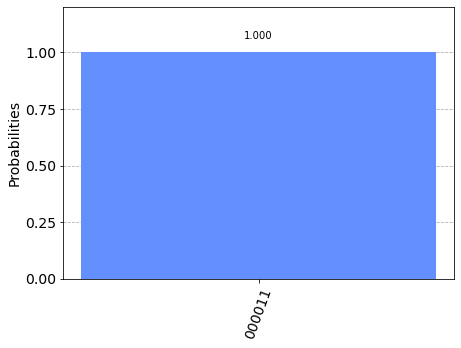

In [98]:
aer_sim = Aer.get_backend('aer_simulator')
# transpiled_circuit = transpile(qc, aer_sim)
transpiled_circuit = transpile(ga, aer_sim)
qobj = assemble(transpiled_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [99]:
backend = device[6]
print("Running on device: ", backend)
from qiskit.tools.monitor import job_monitor
transpiled_ga = transpile(ga, backend, optimization_level=3, scheduling_method='alap')

Running on device:  ibmq_casablanca


In [86]:
job = backend.run(transpiled_ga)
job_monitor(job, interval=2)

Job Status: job has successfully run


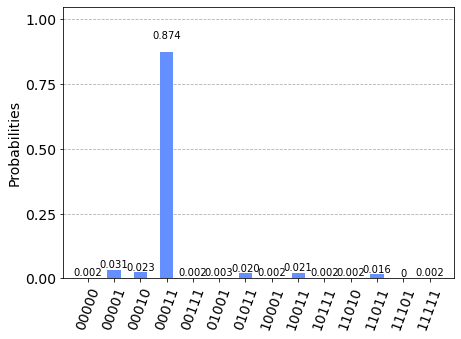

In [87]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

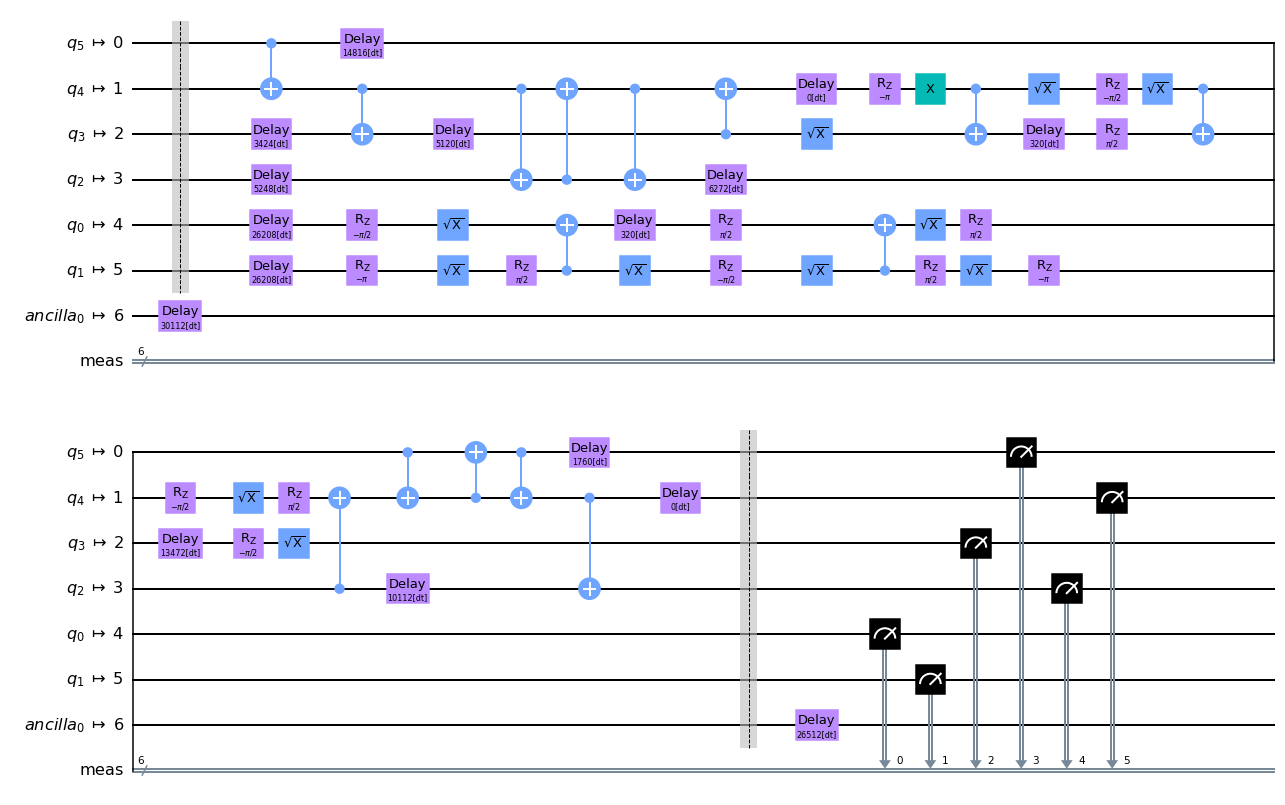

In [100]:
transpiled_ga.draw('mpl')

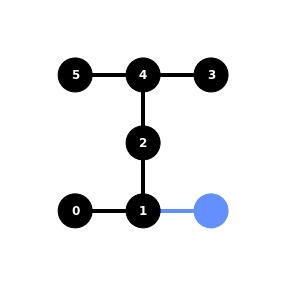

In [101]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(transpiled_ga, backend = backend)

In [102]:
from qiskit.tools.monitor import job_monitor
import winsound
import time

iterations = 10
f = open("GA_CX_Step_4Qubit.txt", "w")
backend = device[6]
answer= [0]*iterations
f.write(str(backend))
f.write(str("\n"))
for i in range(0,iterations,1):
    ga = grovers_algorithm(i)
    print("Running on device: ", backend)
    transpiled_ga = transpile(ga, backend, optimization_level=3, scheduling_method='alap')
#     transpiled_ga = transpile(ga, backend, optimization_level=0, scheduling_method='alap')
    job = backend.run(transpiled_ga) 
    job_monitor(job, interval=2)

    results = job.result()
    answer[i] = results.get_counts()
    
    prob = int(answer[i]['000011'])/1000
    print(i, prob)
    f.write(str(i))
    f.write(str(", "))
    f.write(str(prob))
    f.write(str("\n"))
    
f.close()

# Beeper
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
for i in range(10):
    winsound.Beep(frequency, duration)
    time.sleep(1)

Running on device:  ibmq_casablanca
Job Status: job has successfully run
0 0.859
Running on device:  ibmq_casablanca
Job Status: job has successfully run
1 0.83
Running on device:  ibmq_casablanca
Job Status: job has successfully run
2 0.756
Running on device:  ibmq_casablanca
Job Status: job has successfully run
3 0.771
Running on device:  ibmq_casablanca
Job Status: job has successfully run
4 0.725
Running on device:  ibmq_casablanca


KeyboardInterrupt: 

In [346]:
answer

{'00000': 119,
 '00001': 135,
 '00010': 135,
 '00011': 101,
 '00100': 105,
 '00101': 223,
 '00110': 83,
 '00111': 123}

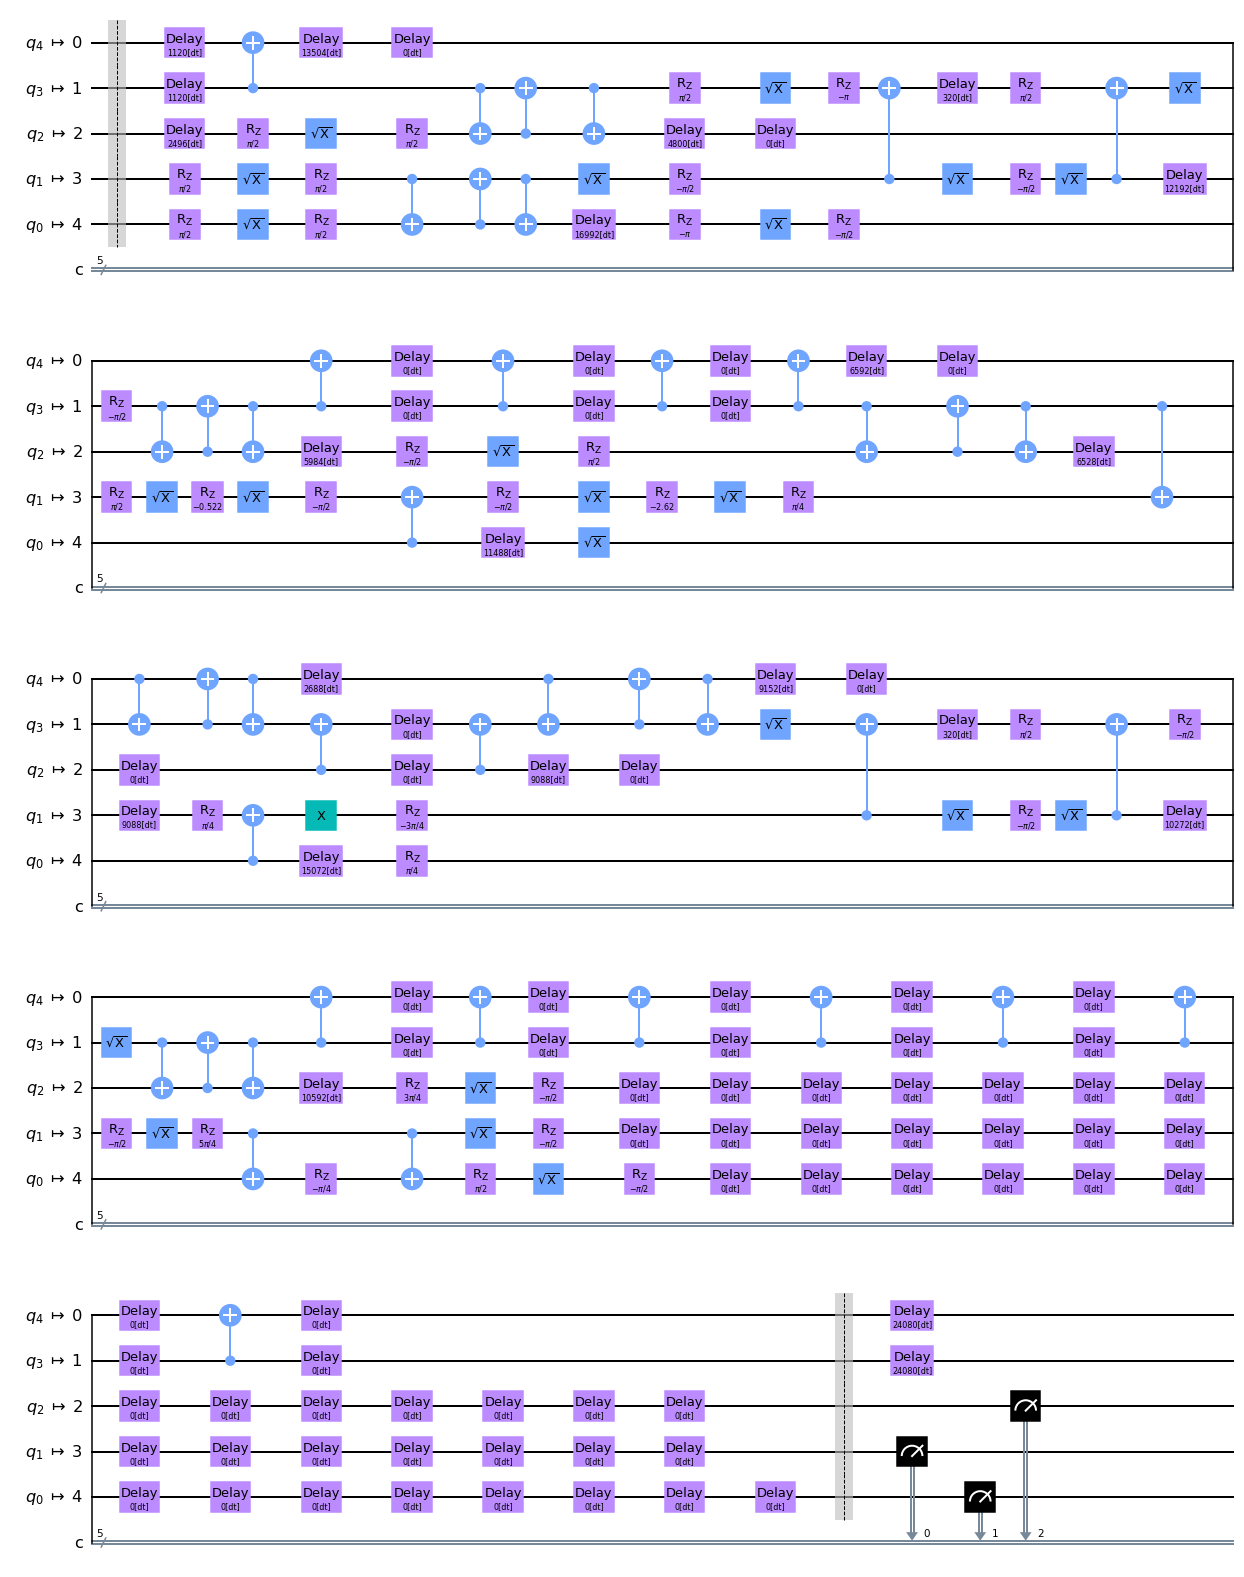

In [347]:
transpiled_grover_circuit.draw('mpl')

# Duration Analysis Code

In [ ]:
transpiled_q = [0]*len(device)
for i in range(len(device)):
    print("============================================")
    print(device[i])
#     transpiled_q[i] = transpile(q, device[i], optimization_level=3, scheduling_method='alap')
    transpiled_q[i] = transpile(malicious_grover, device[i], optimization_level=3, scheduling_method='alap')
    print(transpiled_q[i])
    print("============================================")

In [ ]:
j = 0
print(device[j])
transpiled_q[j].draw('mpl')